# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('salary_dataset.csv')

data

,age,experience,gpa,degree,position,salary
0,30.0,7.0,3.94,bachelor,engineer,32500.0
1,26.0,2.0,2.86,bachelor,NaN,22500.0
2,27.0,0.0,3.13,doctorate,secretary,37000.0
3,32.0,NaN,3.10,bachelor,engineer,24500.0
4,24.0,1.0,3.81,bachelor,accountant,23500.0
...,...,...,...,...,...,...
85,31.0,1.0,2.79,master,engineer,34000.0
86,NaN,5.0,3.27,doctorate,secretary,36000.0
87,28.0,7.0,2.64,doctorate,secretary,38000.0
88,26.0,1.0,2.52,bachelor,secretary,NaN


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         89 non-null     float64
 1   experience  89 non-null     float64
 2   gpa         90 non-null     float64
 3   degree      90 non-null     object 
 4   position    89 non-null     object 
 5   salary      89 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,experience,gpa,salary
count,86.000000,86.000000,86.000000,86.000000
mean,28.023256,3.848837,3.278605,31348.837209
std,4.408486,3.702201,0.528937,9255.227384
min,21.000000,0.000000,2.540000,13000.000000
25%,24.000000,1.000000,2.820000,24500.000000
50%,28.000000,3.000000,3.260000,30500.000000
75%,32.000000,7.000000,3.640000,37375.000000
max,35.000000,13.000000,5.880000,54000.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'salary'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = ['age', 'experience', 'gpa']
categorical_feature = ['degree', 'position']

In [11]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [12]:
ordinal_feature = ['degree']
nominal_feature = ['position']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(['bachelor', 'master', 'doctorate'], dtype=object),
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [21]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
reg = MLPRegressor(
    hidden_layer_sizes=(10),
    activation='relu',
    learning_rate_init=0.00001,
    max_iter=1000,
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [23]:
reg.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0, hidden_layer_sizes=10, learning_rate_init=1e-05,
             max_iter=1000, momentum=0, solver='sgd')

## 6.3. Model's Weight & Bias

In [24]:
reg.coefs_

[array([[ 4.25567149e-01,  4.19367503e-01, -2.19223534e-01,
          1.29580337e+00, -5.41577331e-01, -4.32828472e-01,
          8.56822223e+00,  3.55985827e-01,  6.90147062e+00,
          5.86532584e+00],
        [ 5.95610148e-02,  5.56510495e+00, -5.44807842e-03,
          9.37714235e+00,  1.39981470e-01, -6.06994980e-02,
          5.93510367e+01, -3.03015518e-01,  5.01289931e+01,
          3.91044750e+01],
        [ 7.51943510e-01,  2.72004875e+00,  3.94857726e-02,
          3.81115526e+00,  1.91036203e-01, -3.09268801e-01,
          2.57816823e+01, -3.24877254e-01,  2.13187523e+01,
          1.70525467e+01],
        [-2.92684590e-01,  5.28837562e+00,  3.34872379e-01,
          9.82446780e+00,  3.28691424e-01, -4.71716676e-01,
          5.94035728e+01, -1.94795494e-01,  4.94717569e+01,
          3.90255638e+01],
        [-5.47262374e-01,  1.09889897e+00, -2.44168813e-01,
          3.06085392e+00, -5.28901980e-01, -4.24244534e-01,
          1.83952938e+01,  2.24971023e-01,  1.569820

In [25]:
reg.intercepts_

[array([-2.99510255e-01,  4.74273008e+00, -5.58729188e-01,  9.40104742e+00,
        -5.59273141e-02,  1.66280104e-01,  5.81512580e+01, -5.76148425e-01,
         4.89091797e+01,  3.83104224e+01]),
 array([4.25924047])]

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = reg.predict(X_train_scaled)

In [27]:
y_pred_train

array([39052.00268084, 23872.68156704, 51290.02576625, 26803.24575187,
       23246.1081505 , 32442.09284686, 31342.15085504, 18766.68062962,
       37356.43279027, 33894.89591912, 24755.25524328, 22442.98926285,
       17685.91931685, 21946.77024544, 39914.86254886, 39862.28667427,
       23064.90721618, 35974.70338469, 33853.31768516, 38207.95592884,
       43808.26177134, 17442.60643396, 16817.69191409, 20357.95315995,
       45211.80541342, 24615.82957375, 36701.39981916, 40726.44759018,
       26687.12399999, 29840.15993831, 46053.16462596, 22456.85644135,
       51670.45318759, 30093.84202451, 19972.43887003, 31420.23683733,
       21182.95003183, 31832.38657343, 36136.78456011, 31893.4232501 ,
       42986.63715564, 30147.83900492, 29977.67944322, 43028.34126057,
       33274.13286129, 33696.04735769, 32220.55130673, 40673.79043829,
       33457.83387121, 47001.47091034, 35243.3868208 , 26423.79614861,
       30423.20229321, 31213.54090188, 49519.73988291, 32216.4735351 ,
      

## 7.2. Test Set

In [28]:
y_pred_test = reg.predict(X_test_scaled)

In [29]:
y_pred_test

array([31990.05256978, 22572.8204181 , 26365.81416024, 28675.29188313,
       26627.6022677 , 27411.08794915, 29616.57784011, 46704.41141053,
       31453.2330105 , 22607.72587281, 21082.02136818, 35699.07718551,
       34389.57176572, 29418.31683232, 43040.63413605, 21845.62322372,
       17459.50427836, 29082.95706513])

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.8741997735527565
mean_squared_error =		 11358993.240922723
mean_absolute_error =		 2887.1253612800647
mean_absolute_percentage_error = 0.10133477943174796


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

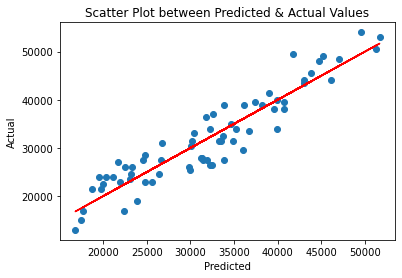

In [31]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [32]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.8566972917083912
mean_squared_error =		 8036451.264378188
mean_absolute_error =		 2241.8152403242266
mean_absolute_percentage_error = 0.08139091423359152


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

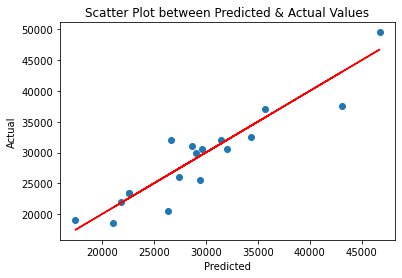

In [33]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [34]:
import pickle

In [35]:
pickle.dump((reg, 
             ordinal_encoder, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature),  open('neural_network_regrssion_model.pickle', 'wb'))